In [486]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tkinter as tk
import matplotlib.pyplot as plt

In [487]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tkinter import messagebox
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [488]:
dataset = pd.read_csv("C:/Users/busra/OneDrive/Masaüstü/kullanıcıyorumları.csv")

In [489]:
import os
print(os.getcwd()) 

C:\Users\busra


In [490]:
dataset

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


In [491]:
target = dataset['Rating'].values.tolist()
data = dataset['Review'].values.tolist()

In [492]:
cutoff = int(len(data) * 0.80)
x_train, x_test = data[:cutoff], data[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

In [493]:
x_train[500]

'ürün sipariş verdim 2 gün içinde elime ulaştı her zaman ki gibi kullanışlı bi ürün daha once de bu mouse dan almıştım.bu yüzden tereddütsüz aldım . alacak olanlara öneririm'

In [494]:
x_train[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [495]:
y_train[800]

1

In [496]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)

In [497]:
tokenizer.fit_on_texts(data)

In [498]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [499]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)

In [500]:
x_train[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [501]:
print(x_train_tokens[800])

[19, 341, 52, 194, 30, 54, 7992, 55, 209, 603, 7887, 3, 36, 114, 164, 479, 85, 1, 1682, 782, 30, 2, 380, 326, 3, 1, 81, 132, 562, 9, 10]


In [502]:
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [503]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [504]:
print(num_tokens)

[ 4  4 65 ...  4 10 37]


In [505]:
x_train[2]

'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech'

In [506]:
np.mean(num_tokens)

20.744703220162876

In [507]:
np.max(num_tokens)

295

In [508]:
np.argmax(num_tokens)

21941

In [509]:
x_train[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [510]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

59

In [511]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9597982726686571

In [512]:
x_train_pad = pad_sequences(x_train_tokens, maxlen = max_tokens)

In [513]:
x_test_pad = pad_sequences(x_test_tokens, maxlen = max_tokens)

In [514]:
y_train = np.array(y_train)

In [515]:
y_test = np.array(y_test)

In [516]:
x_train_pad.shape

(194797, 59)

In [517]:
x_test_pad.shape

(48700, 59)

In [518]:
np.array(x_train_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [519]:
x_train_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   19,  341,   52,  194,   30,
         54, 7992,   55,  209,  603, 7887,    3,   36,  114,  164,  479,
         85,    1, 1682,  782,   30,    2,  380,  326,    3,    1,   81,
        132,  562,    9,   10])

In [520]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [521]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [522]:
x_train[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [523]:
tokens_to_string(x_train_tokens[800])

'ürünü alalı 3 hafta kadar oldu aralıksız kullanıyorum sürekli açık durur ve ben günde yaklaşık 12 saat çok kullanırım şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim'

In [524]:
model = Sequential()

In [525]:
embedding_size = 50

In [526]:
model.add(Embedding(input_dim=num_words,
                   output_dim=embedding_size,
                   input_length=max_tokens,
                   name='embedding_layer'))

In [527]:
model.add(GRU(units=32, return_sequences=True))
model.add(GRU(units=16, return_sequences=True))
model.add(GRU(units=8, return_sequences=True))
model.add(GRU(units=4))
model.add(Dense(1, activation='sigmoid'))

In [528]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [529]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding  (None, 59, 50)            500000    
 )                                                               
                                                                 
 gru_19 (GRU)                (None, 59, 32)            8064      
                                                                 
 gru_20 (GRU)                (None, 59, 16)            2400      
                                                                 
 gru_21 (GRU)                (None, 59, 8)             624       
                                                                 
 gru_22 (GRU)                (None, 4)                 168       
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                      

In [530]:
history = model.fit(x_train_pad, y_train, epochs=8, batch_size=128, validation_data=(x_test_pad, y_test))

Epoch 1/8
1522/1522 [==============================] - 148s 92ms/step - loss: 0.2227 - accuracy: 0.9441 - val_loss: 0.1858 - val_accuracy: 0.9447
Epoch 2/8
1522/1522 [==============================] - 138s 91ms/step - loss: 0.1049 - accuracy: 0.9655 - val_loss: 0.1109 - val_accuracy: 0.9611
Epoch 3/8
1522/1522 [==============================] - 135s 89ms/step - loss: 0.0680 - accuracy: 0.9777 - val_loss: 0.1133 - val_accuracy: 0.9621
Epoch 4/8
1522/1522 [==============================] - 130s 86ms/step - loss: 0.0495 - accuracy: 0.9845 - val_loss: 0.1353 - val_accuracy: 0.9553
Epoch 5/8
1522/1522 [==============================] - 124s 82ms/step - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.1565 - val_accuracy: 0.9553
Epoch 6/8
1522/1522 [==============================] - 128s 84ms/step - loss: 0.0268 - accuracy: 0.9927 - val_loss: 0.1942 - val_accuracy: 0.9497
Epoch 7/8
1522/1522 [==============================] - 125s 82ms/step - loss: 0.0215 - accuracy: 0.9941 - val_loss: 0.1946 -

In [531]:
import seaborn as sns
from tensorflow.keras.callbacks import History

if isinstance(history, dict):
    history_obj = History()
    history_obj.history = history
    history = history_obj
history_data = history.history

In [532]:
print(type(history))

<class 'keras.src.callbacks.History'>


In [533]:
print(history_data.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [534]:
result = model.evaluate(x_test_pad, y_test)

1522/1522 [==============================] - 19s 12ms/step - loss: 0.2121 - accuracy: 0.9512


In [535]:
result[1]

0.9511704444885254

In [536]:
y_pred = model.predict(x=x_test_pad[0:1000])
y_pred = y_pred.T[0]

32/32 [==============================] - 1s 13ms/step


In [537]:
cls_pred = np.array([1.0 if p>0.5 else 0.0 for p in y_pred])

In [538]:
cls_true = np.array(y_test[0:1000])

In [539]:
incorrect = np.where(cls_pred != cls_true)
incorrect = incorrect[0]

In [540]:
len(incorrect)

59

In [541]:
idx = incorrect[0]
idx

5

In [542]:
text = x_test[idx]
text

'Ürün güzel ama teslimat çok geç yapıldı.'

In [543]:
y_pred[idx]

0.9523307

In [544]:
cls_true[idx]

0

In [545]:
text1 = "bu ürün çok iyi herkese tavsiye ederim"
text2 = "kargo çok hızlı aynı gün elime geçti"
text3 = "büyük bir hayal kırıklığı yaşadım bu ürün bu markaya yakışmamış"
text4 = "mükemmel"
text5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı tavsiye etmem"
text6 = "hiç resimde gösterildiği gibi değil"
text7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
text8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürünü geri iade ediyorum"
text9 = "tam bir fiyat performans ürünü"
text10 = "beklediğim gibi çıkmadı"
texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9, text10]

In [546]:
tokens = tokenizer.texts_to_sequences(texts)

In [547]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(10, 59)

In [548]:
model.predict(tokens_pad)

1/1 [==============================] - 0s 27ms/step


array([[0.9991425 ],
       [0.9924799 ],
       [0.8066046 ],
       [0.9986469 ],
       [0.01523823],
       [0.00476665],
       [0.9990832 ],
       [0.00271517],
       [0.9991178 ],
       [0.00859781]], dtype=float32)

In [549]:
def predict_sentiment():
    
    user_text = text_input.get("1.0", "end-1c")
    if not user_text.strip():
        messagebox.showwarning("Uyarı", "Lütfen bir metin giriniz!")
        return

    
    tokens = tokenizer.texts_to_sequences([user_text])
    tokens_pad = pad_sequences(tokens, maxlen=max_tokens)

    
    prediction = model.predict(tokens_pad)
    if prediction[0][0] > 0.5:
        sentiment = "Pozitif ✔"
        sentiment_color = "#28a745"  
    else:
        sentiment = "Negatif ✘"
        sentiment_color = "#dc3545"  

    
    result_label.config(text=sentiment, fg=sentiment_color)


In [550]:
def create_interface():
   
    root = tk.Tk()
    root.title("Duygu Analizi")
    root.geometry("500x400")
    root.configure(bg="#f8f9fa") 

    
    tk.Label(root, text="Duygu Analizi Uygulaması", font=("Helvetica", 16, "bold"), bg="#f8f9fa", fg="#343a40").pack(pady=10)

    
    tk.Label(root, text="Metni Giriniz:", font=("Helvetica", 12), bg="#f8f9fa", fg="#343a40").pack(pady=5)
    global text_input
    text_input = tk.Text(root, height=5, width=50, font=("Helvetica", 11), bd=2, relief="solid")
    text_input.pack(pady=5)

    
    predict_button = tk.Button(root, text="Tahmin Et", font=("Helvetica", 12, "bold"), bg="#007bff", fg="white",
                               activebackground="#0056b3", activeforeground="white", bd=0, relief="flat", padx=10, pady=5,
                               command=predict_sentiment)
    predict_button.pack(pady=10)

    
    global result_label
    result_label = tk.Label(root, text="", font=("Helvetica", 14, "bold"), bg="#f8f9fa")
    result_label.pack(pady=20)

    
    root.mainloop()


create_interface()


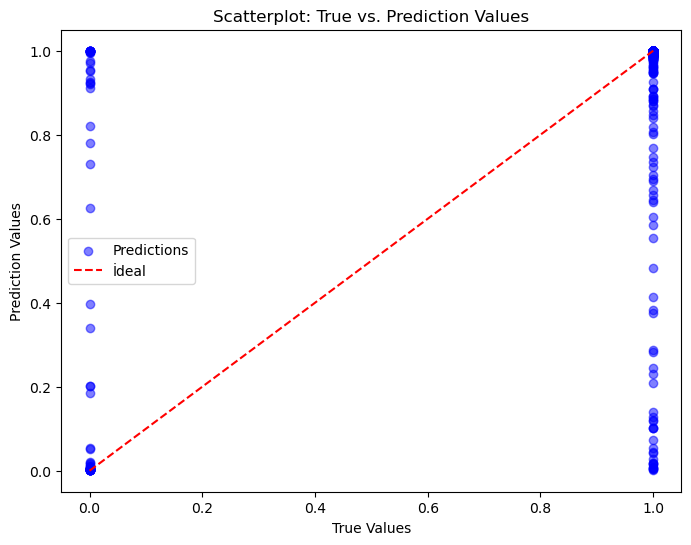

In [551]:
plt.figure(figsize=(8, 6))
plt.scatter(cls_true[:1000], y_pred[:1000], alpha=0.5, c='blue', label='Predictions')
plt.plot([0, 1], [0, 1], 'r--', label='İdeal')
plt.title("Scatterplot: True vs. Prediction Values")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.legend()
plt.show()

Epoch 1/10
4/4 [==============================] - 1s 62ms/step - loss: 0.7026 - accuracy: 0.4800 - val_loss: 0.7480 - val_accuracy: 0.2000
Epoch 2/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6995 - accuracy: 0.4900 - val_loss: 0.7464 - val_accuracy: 0.2000
Epoch 3/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6977 - accuracy: 0.5100 - val_loss: 0.7454 - val_accuracy: 0.2000
Epoch 4/10
4/4 [==============================] - 0s 16ms/step - loss: 0.6963 - accuracy: 0.5100 - val_loss: 0.7442 - val_accuracy: 0.2000
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.7436 - val_accuracy: 0.3000
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.7435 - val_accuracy: 0.2500
Epoch 7/10
4/4 [==============================] - 0s 16ms/step - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.7438 - val_accuracy: 0.4000
Epoch 8/10
4/4 [===========

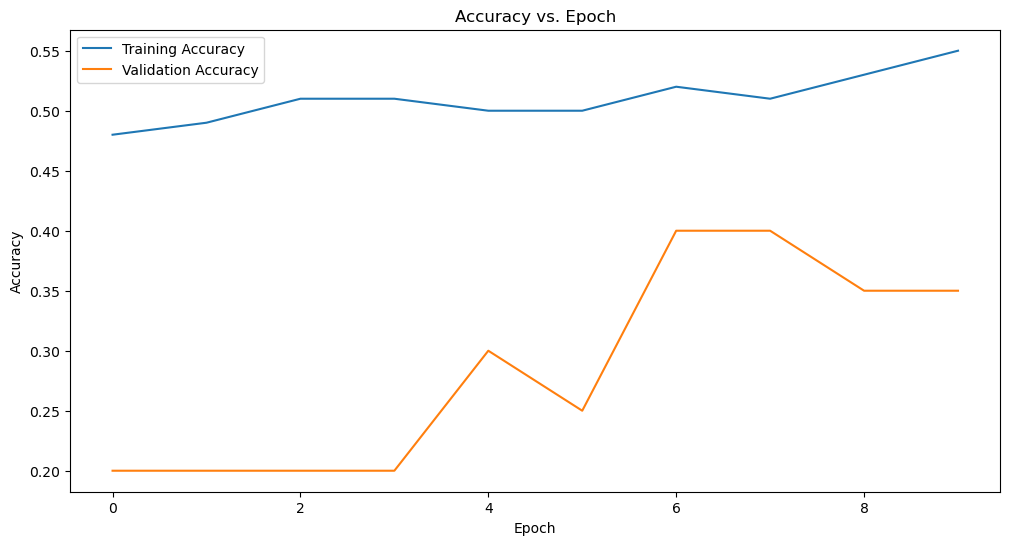

In [552]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), 
    Dense(1, activation='sigmoid')  
])


model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])


import numpy as np
x_train = np.random.rand(100, 10)
y_train = np.random.randint(0, 2, size=(100,))

x_val = np.random.rand(20, 10)
y_val = np.random.randint(0, 2, size=(20,))


history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)


plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()




Epoch 1/10
4/4 [==============================] - 1s 70ms/step - loss: 0.7058 - accuracy: 0.5300 - val_loss: 0.7144 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 15ms/step - loss: 0.7027 - accuracy: 0.5500 - val_loss: 0.7169 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.7026 - accuracy: 0.5200 - val_loss: 0.7207 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 14ms/step - loss: 0.7014 - accuracy: 0.5200 - val_loss: 0.7208 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 0s 14ms/step - loss: 0.7006 - accuracy: 0.5200 - val_loss: 0.7204 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6993 - accuracy: 0.5300 - val_loss: 0.7209 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6985 - accuracy: 0.5300 - val_loss: 0.7220 - val_accuracy: 0.5000
Epoch 8/10
4/4 [===========

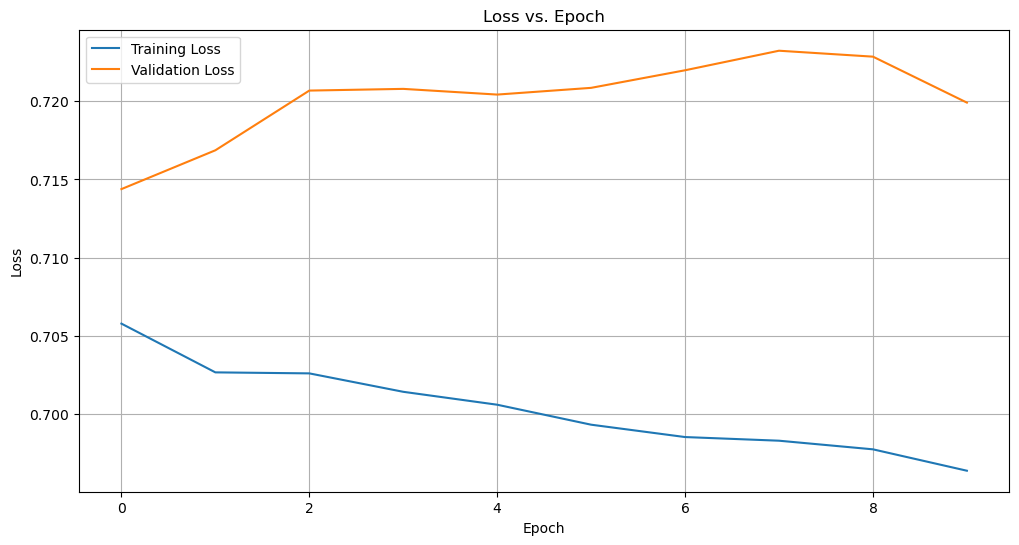

In [553]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])


x_train = np.random.rand(100, 10)
y_train = np.random.randint(0, 2, size=(100,))
x_val = np.random.rand(20, 10)
y_val = np.random.randint(0, 2, size=(20,))


history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [554]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [555]:
print(f"Model Accuracy: {result[1] * 100:.2f}%")

Model Accuracy: 95.12%


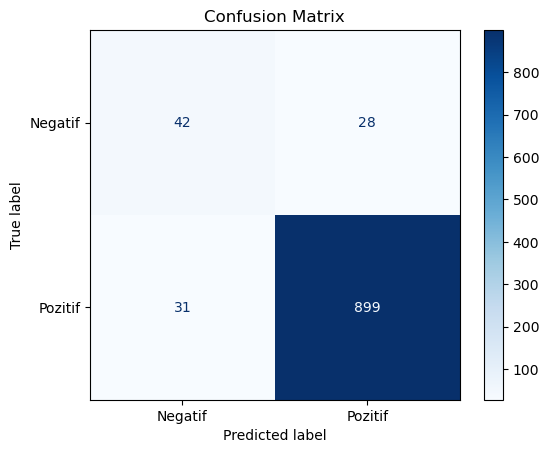

In [556]:
conf_matrix = confusion_matrix(cls_true, cls_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negatif", "Pozitif"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()